# FPL ML Lineup

In [1]:
#Import libraries.
import pandas as pd
import numpy as np

import os
from os.path import dirname, join

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

## Load Data

In [3]:
def merged_gws(season):

    path = os.getcwd()
    file_name = 'merged_gw.csv'
    season_path = join(dirname(dirname("__file__")), path, 'data', season, 'gws', file_name)
    return season_path

In [4]:
def clean_player_name(fpl_data, col = 'name'):

    fpl_data[col] = fpl_data[col].str.strip()
    fpl_data[col] = fpl_data[col].str.replace('\d+', '')
    fpl_data[col] = fpl_data[col].str.replace('_', ' ')
    return fpl_data

In [5]:
def opponent_team_name(fpl_data):

    path = os.getcwd()
    file_name = 'master_team_list.csv'
    team_path = join(dirname(dirname("__file__")), path, 'data', file_name)
    team_data = pd.read_csv(team_path)
    fpl_data['id'] = fpl_data['season'].astype(str) + '_' + fpl_data['opponent_team'].astype(str)
    team_data['id'] = team_data['season'].astype(str) + '_' + team_data['team'].astype(str)
    fpl_data = pd.merge(fpl_data, team_data, on = 'id', how = 'left')
    fpl_data = fpl_data.rename(columns = {"team_name": "opp_team_name"})
    return fpl_data

In [6]:
def players_filter(fpl_data, col = 'position'):

    fpl_data[col] = fpl_data.groupby('name')[col].apply(lambda x: x.ffill().bfill())
    fpl_data = fpl_data[fpl_data[col].notnull()]
    return fpl_data

In [7]:
def create_fpl_data(fpl_data):
    
    path = os.getcwd()
    file_name = 'cleaned_merged_seasons.csv'
    file_path = join(dirname(dirname("__file__")), path, 'data', file_name)
    fpl_data.to_csv(file_path, encoding = 'utf-8')
    return fpl_data

In [8]:
def create_data():

    season_latin = ['2020-21', '2021-22'] 
    encoding_latin = ['utf-8', 'utf-8']

    fpl_data = pd.DataFrame()
    for i,j in zip(season_latin, encoding_latin):
        data = pd.read_csv(merged_gws(season=f'{i}'), encoding=f'{j}')
        data['season'] = i
        fpl_data = fpl_data.append(data, ignore_index= True, sort= False)

    fpl_data = fpl_data[['season','name', 'position', 'team', 'assists','bonus','bps','clean_sheets','creativity','element','fixture','goals_conceded','goals_scored','ict_index','influence','kickoff_time','minutes','opponent_team','own_goals','penalties_missed','penalties_saved','red_cards','round','saves','selected','team_a_score','team_h_score','threat','total_points','transfers_balance','transfers_in','transfers_out','value','was_home','yellow_cards','GW']]

    fpl_data = clean_player_name(fpl_data, col='name')
    fpl_data = players_filter(fpl_data, col='position')
    fpl_data = opponent_team_name(fpl_data)

    fpl_data = fpl_data[['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW']]
    
    create_fpl_data(fpl_data)

In [9]:
fpl_data = pd.read_csv('data/cleaned_merged_seasons.csv',index_col=0,low_memory=False)
fpl_data = fpl_data.sort_values(['season_x','name','GW'])
fpl_data

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
2273,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,20,0,0,0.0,0.0,2016-08-21T15:00:00Z,0,2,Bournemouth,0,0,0,0,2,0,11531,0.0,1.0,0.0,0,-3002,79,3081,55,True,0,2
4481,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,29,0,0,0.0,0.0,2016-08-28T15:00:00Z,0,10,Man City,0,0,0,0,3,0,9587,1.0,3.0,0.0,0,-2053,28,2081,54,False,0,3
6903,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,38,0,0,0.0,0.0,2016-09-10T14:00:00Z,0,18,Watford,0,0,0,0,4,0,8427,4.0,2.0,0.0,0,-1221,45,1266,54,True,0,4
7105,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,46,0,0,0.0,0.0,2016-09-17T14:00:00Z,0,19,West Brom,0,0,0,0,5,0,7933,2.0,4.0,0.0,0,-520,29,549,54,False,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95604,2021-22,Çaglar Söyüncü,DEF,Leicester,0,3,30,1,0.8,217,337,0,0,2.0,19.4,2022-04-23T14:00:00Z,90,2,Aston Villa,0,0,0,0,34,0,170925,0.0,0.0,0.0,9,-3439,4322,7761,49,True,0,34
96348,2021-22,Çaglar Söyüncü,DEF,Leicester,0,0,16,0,5.0,217,347,3,0,3.0,25.2,2022-05-01T13:00:00Z,90,17,Spurs,0,0,0,0,35,0,178384,1.0,3.0,0.0,1,6884,12764,5880,49,False,0,35
96980,2021-22,Çaglar Söyüncü,DEF,Leicester,0,0,0,0,0.0,217,357,0,0,0.0,0.0,2022-05-08T13:00:00Z,0,8,Everton,0,0,0,0,36,0,218177,2.0,1.0,0.0,0,34832,38483,3651,49,True,0,36
96981,2021-22,Çaglar Söyüncü,DEF,Leicester,0,0,0,0,0.0,217,207,0,0,0.0,0.0,2022-05-11T18:45:00Z,0,15,Norwich,0,0,0,0,36,0,218177,0.0,3.0,0.0,0,34832,38483,3651,49,True,0,36


In [10]:
def summary(data):
    
    print('Rows, Columns: ', data.shape)
    print('\n')
    print('No. of Players: ', data['name'].nunique())
    print('No. of Teams: ', data['team_x'].nunique())
    
    display(data.head())
    
summary(fpl_data)

Rows, Columns:  (98402, 37)


No. of Players:  989
No. of Teams:  23


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
2273,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,20,0,0,0.0,0.0,2016-08-21T15:00:00Z,0,2,Bournemouth,0,0,0,0,2,0,11531,0.0,1.0,0.0,0,-3002,79,3081,55,True,0,2
4481,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,29,0,0,0.0,0.0,2016-08-28T15:00:00Z,0,10,Man City,0,0,0,0,3,0,9587,1.0,3.0,0.0,0,-2053,28,2081,54,False,0,3
6903,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,38,0,0,0.0,0.0,2016-09-10T14:00:00Z,0,18,Watford,0,0,0,0,4,0,8427,4.0,2.0,0.0,0,-1221,45,1266,54,True,0,4
7105,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,46,0,0,0.0,0.0,2016-09-17T14:00:00Z,0,19,West Brom,0,0,0,0,5,0,7933,2.0,4.0,0.0,0,-520,29,549,54,False,0,5


## Create New Variables

In [11]:
fpl_data.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [12]:
fpl_data["form_assists"] = [0] * len(fpl_data)
fpl_data['form_bonus'] = [0] * len(fpl_data)
fpl_data['form_clean_sheets'] = [0] * len(fpl_data)
fpl_data['form_goals_scored'] = [0] * len(fpl_data)
fpl_data['form_goals_conceded'] = [0] * len(fpl_data)
fpl_data['form_yellow_cards'] = [0] * len(fpl_data)
fpl_data['form_saves'] = [0] * len(fpl_data)
fpl_data["form_minutes"] = [0] * len(fpl_data)
fpl_data['form_selected'] = [0] * len(fpl_data)
fpl_data['form_transfers_balance'] = [0] * len(fpl_data)
fpl_data.dropna(inplace = True)

In [13]:
fpl_data

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,form_assists,form_bonus,form_clean_sheets,form_goals_scored,form_goals_conceded,form_yellow_cards,form_saves,form_minutes,form_selected,form_transfers_balance
49472,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14T19:15:00Z,45,5,Chelsea,0,0,0,0,1,0,32205,3.0,1.0,32.0,1,0,0,0,55,True,0,1,0,0,0,0,0,0,0,0,0,0
49897,2020-21,Aaron Connolly,FWD,Brighton,0,2,27,1,11.3,78,16,0,1,6.9,34.8,2020-09-20T13:00:00Z,89,14,Newcastle,0,0,0,0,2,0,35030,3.0,0.0,23.0,8,-1161,5332,6493,55,False,0,2,0,0,0,0,0,0,0,0,0,0
50436,2020-21,Aaron Connolly,FWD,Brighton,0,0,2,0,12.1,78,19,2,0,1.9,0.0,2020-09-26T11:30:00Z,73,13,Man Utd,0,0,0,0,3,0,55356,3.0,2.0,8.0,2,13526,26823,13297,55,True,0,3,0,0,0,0,0,0,0,0,0,0
50990,2020-21,Aaron Connolly,FWD,Brighton,0,0,7,0,0.3,78,32,3,0,0.7,3.0,2020-10-03T14:00:00Z,65,7,Everton,0,0,0,0,4,0,55125,2.0,4.0,4.0,2,-1311,10399,11710,55,False,0,4,0,0,0,0,0,0,0,0,0,0
51552,2020-21,Aaron Connolly,FWD,Brighton,1,0,13,0,10.3,78,40,0,0,3.0,17.2,2020-10-18T13:00:00Z,12,6,Crystal Palace,0,0,0,0,5,0,46774,1.0,1.0,2.0,4,-8992,5860,14852,55,False,0,5,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95604,2021-22,Çaglar Söyüncü,DEF,Leicester,0,3,30,1,0.8,217,337,0,0,2.0,19.4,2022-04-23T14:00:00Z,90,2,Aston Villa,0,0,0,0,34,0,170925,0.0,0.0,0.0,9,-3439,4322,7761,49,True,0,34,0,0,0,0,0,0,0,0,0,0
96348,2021-22,Çaglar Söyüncü,DEF,Leicester,0,0,16,0,5.0,217,347,3,0,3.0,25.2,2022-05-01T13:00:00Z,90,17,Spurs,0,0,0,0,35,0,178384,1.0,3.0,0.0,1,6884,12764,5880,49,False,0,35,0,0,0,0,0,0,0,0,0,0
96980,2021-22,Çaglar Söyüncü,DEF,Leicester,0,0,0,0,0.0,217,357,0,0,0.0,0.0,2022-05-08T13:00:00Z,0,8,Everton,0,0,0,0,36,0,218177,2.0,1.0,0.0,0,34832,38483,3651,49,True,0,36,0,0,0,0,0,0,0,0,0,0
96981,2021-22,Çaglar Söyüncü,DEF,Leicester,0,0,0,0,0.0,217,207,0,0,0.0,0.0,2022-05-11T18:45:00Z,0,15,Norwich,0,0,0,0,36,0,218177,0.0,3.0,0.0,0,34832,38483,3651,49,True,0,36,0,0,0,0,0,0,0,0,0,0


In [14]:
fpl_data_form_dict = {}

def calculating_form(feature):

    fpl_data_form_dict[feature] = []
    
    for i in range(len(fpl_data)):
        
        if i % 38 >= 4:
            fpl_data_form = fpl_data.iloc[i-1][feature]
            fpl_data_form += fpl_data.iloc[i-2][feature]
            fpl_data_form += fpl_data.iloc[i-3][feature]
            fpl_data_form += fpl_data.iloc[i-4][feature]
            fpl_data_form /= 4
            
            fpl_data_form_dict[feature].append(fpl_data_form)
        else:
            fpl_data_form_dict[feature].append(None)

In [15]:
import threading

threads = []
features = ['assists', 'bonus', 'clean_sheets', 
            'goals_conceded', 'goals_scored',
            'minutes', 'saves', 'selected',
            'transfers_balance','yellow_cards']

for feature in features:    
    t = threading.Thread(target = calculating_form, args=(feature,))
    t.start()
    threads.append(t)

for thread in threads:
    thread.join()
print('threading completed')

for k,v in fpl_data_form_dict.items():
    fpl_data[f'form_{k}'] = v

threading completed


In [16]:
fpl_data.isna().sum()

season_x                     0
name                         0
position                     0
team_x                       0
assists                      0
bonus                        0
bps                          0
clean_sheets                 0
creativity                   0
element                      0
fixture                      0
goals_conceded               0
goals_scored                 0
ict_index                    0
influence                    0
kickoff_time                 0
minutes                      0
opponent_team                0
opp_team_name                0
own_goals                    0
penalties_missed             0
penalties_saved              0
red_cards                    0
round                        0
saves                        0
selected                     0
team_a_score                 0
team_h_score                 0
threat                       0
total_points                 0
transfers_balance            0
transfers_in                 0
transfer

In [17]:
fpl_data

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,form_assists,form_bonus,form_clean_sheets,form_goals_scored,form_goals_conceded,form_yellow_cards,form_saves,form_minutes,form_selected,form_transfers_balance
49472,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14T19:15:00Z,45,5,Chelsea,0,0,0,0,1,0,32205,3.0,1.0,32.0,1,0,0,0,55,True,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49897,2020-21,Aaron Connolly,FWD,Brighton,0,2,27,1,11.3,78,16,0,1,6.9,34.8,2020-09-20T13:00:00Z,89,14,Newcastle,0,0,0,0,2,0,35030,3.0,0.0,23.0,8,-1161,5332,6493,55,False,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50436,2020-21,Aaron Connolly,FWD,Brighton,0,0,2,0,12.1,78,19,2,0,1.9,0.0,2020-09-26T11:30:00Z,73,13,Man Utd,0,0,0,0,3,0,55356,3.0,2.0,8.0,2,13526,26823,13297,55,True,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50990,2020-21,Aaron Connolly,FWD,Brighton,0,0,7,0,0.3,78,32,3,0,0.7,3.0,2020-10-03T14:00:00Z,65,7,Everton,0,0,0,0,4,0,55125,2.0,4.0,4.0,2,-1311,10399,11710,55,False,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51552,2020-21,Aaron Connolly,FWD,Brighton,1,0,13,0,10.3,78,40,0,0,3.0,17.2,2020-10-18T13:00:00Z,12,6,Crystal Palace,0,0,0,0,5,0,46774,1.0,1.0,2.0,4,-8992,5860,14852,55,False,0,5,0.0,0.50,0.25,0.25,1.75,0.0,0.0,68.0,44429.00,2763.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95604,2021-22,Çaglar Söyüncü,DEF,Leicester,0,3,30,1,0.8,217,337,0,0,2.0,19.4,2022-04-23T14:00:00Z,90,2,Aston Villa,0,0,0,0,34,0,170925,0.0,0.0,0.0,9,-3439,4322,7761,49,True,0,34,0.0,0.00,0.00,0.00,0.75,0.0,0.0,45.0,164687.00,11312.00
96348,2021-22,Çaglar Söyüncü,DEF,Leicester,0,0,16,0,5.0,217,347,3,0,3.0,25.2,2022-05-01T13:00:00Z,90,17,Spurs,0,0,0,0,35,0,178384,1.0,3.0,0.0,1,6884,12764,5880,49,False,0,35,0.0,0.75,0.25,0.00,0.75,0.0,0.0,67.5,170591.25,11866.50
96980,2021-22,Çaglar Söyüncü,DEF,Leicester,0,0,0,0,0.0,217,357,0,0,0.0,0.0,2022-05-08T13:00:00Z,0,8,Everton,0,0,0,0,36,0,218177,2.0,1.0,0.0,0,34832,38483,3651,49,True,0,36,0.0,0.75,0.25,0.00,1.25,0.0,0.0,67.5,177757.75,13124.25
96981,2021-22,Çaglar Söyüncü,DEF,Leicester,0,0,0,0,0.0,217,207,0,0,0.0,0.0,2022-05-11T18:45:00Z,0,15,Norwich,0,0,0,0,36,0,218177,0.0,3.0,0.0,0,34832,38483,3651,49,True,0,36,0.0,0.75,0.25,0.00,0.75,0.0,0.0,45.0,187086.75,15700.75


In [18]:
fpl_data.dropna(inplace = True)

In [19]:
fpl_data.shape

(43778, 47)

In [20]:
summary(fpl_data)

Rows, Columns:  (43778, 47)


No. of Players:  988
No. of Teams:  23


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,form_assists,form_bonus,form_clean_sheets,form_goals_scored,form_goals_conceded,form_yellow_cards,form_saves,form_minutes,form_selected,form_transfers_balance
51552,2020-21,Aaron Connolly,FWD,Brighton,1,0,13,0,10.3,78,40,0,0,3.0,17.2,2020-10-18T13:00:00Z,12,6,Crystal Palace,0,0,0,0,5,0,46774,1.0,1.0,2.0,4,-8992,5860,14852,55,False,0,5,0.00,0.5,0.25,0.25,1.75,0.0,0.0,68.00,44429.00,2763.50
52139,2020-21,Aaron Connolly,FWD,Brighton,0,0,0,0,0.0,78,51,0,0,0.0,0.0,2020-10-26T17:30:00Z,0,18,West Brom,0,0,0,0,6,0,50818,1.0,1.0,0.0,0,2053,9519,7466,55,True,0,6,0.25,0.5,0.25,0.25,1.25,0.0,0.0,59.75,48071.25,515.50
52729,2020-21,Aaron Connolly,FWD,Brighton,0,0,0,0,0.0,78,67,0,0,0.0,0.0,2020-11-01T19:15:00Z,0,17,Spurs,0,0,0,0,7,0,43547,1.0,2.0,0.0,0,-7045,1470,8515,55,False,0,7,0.25,0.0,0.00,0.00,1.25,0.0,0.0,37.50,52018.25,1319.00
53326,2020-21,Aaron Connolly,FWD,Brighton,0,0,3,0,0.0,78,70,0,0,0.0,0.2,2020-11-06T17:30:00Z,4,4,Burnley,0,0,0,0,8,0,39808,0.0,0.0,0.0,1,-4140,2117,6257,54,True,0,8,0.25,0.0,0.00,0.00,0.75,0.0,0.0,19.25,49066.00,-3823.75
53926,2020-21,Aaron Connolly,FWD,Brighton,0,0,0,0,0.0,78,79,0,0,0.0,0.0,2020-11-21T15:00:00Z,0,2,Aston Villa,0,0,0,0,9,0,33468,2.0,1.0,0.0,0,-6056,967,7023,54,False,0,9,0.25,0.0,0.00,0.00,0.00,0.0,0.0,4.00,45236.75,-4531.00


In [21]:
fpl_data.to_csv('data/fpl_data.csv')

In [22]:
fpl_data.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'form_assists', 'form_bonus',
       'form_clean_sheets', 'form_goals_scored', 'form_goals_conceded',
       'form_yellow_cards', 'form_saves', 'form_minutes', 'form_selected',
       'form_transfers_balance'],
      dtype='object')

## Exploratory Data Analysis

In [23]:
#Import libraries for EDA.
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
plot_cols = ['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'form_assists', 'form_bonus',
       'form_clean_sheets', 'form_goals_scored', 'form_goals_conceded',
       'form_yellow_cards', 'form_saves', 'form_minutes', 'form_selected',
       'form_transfers_balance']

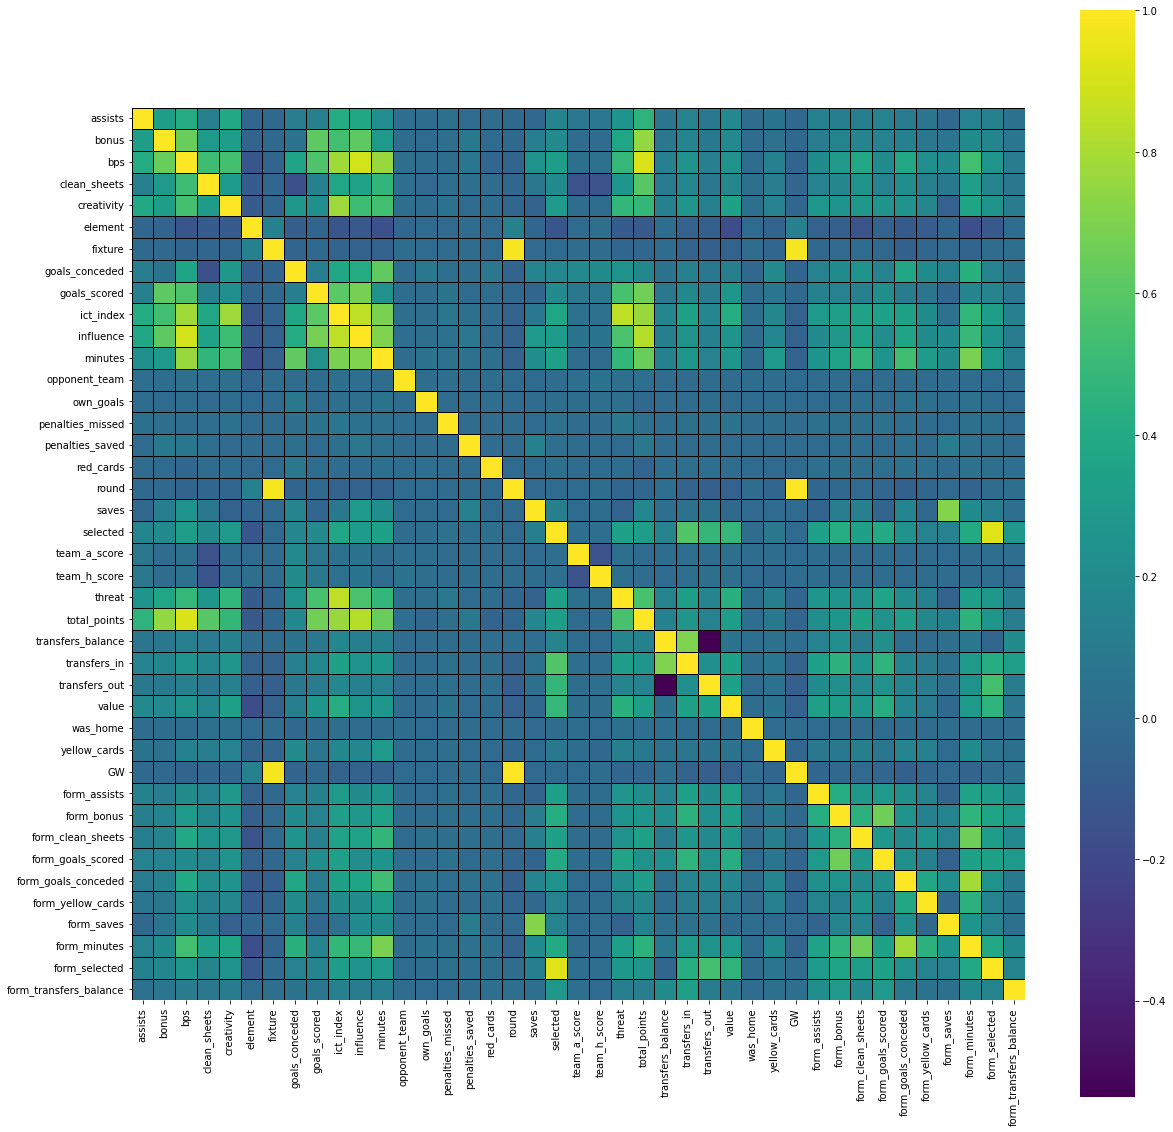

In [25]:
#Correlation matrix of the FPL data features.
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(fpl_data[plot_cols].corr(), linewidths = 0.5, square = True, cmap =plt.cm.viridis, linecolor='black', annot=False, ax=ax)
plt.show()

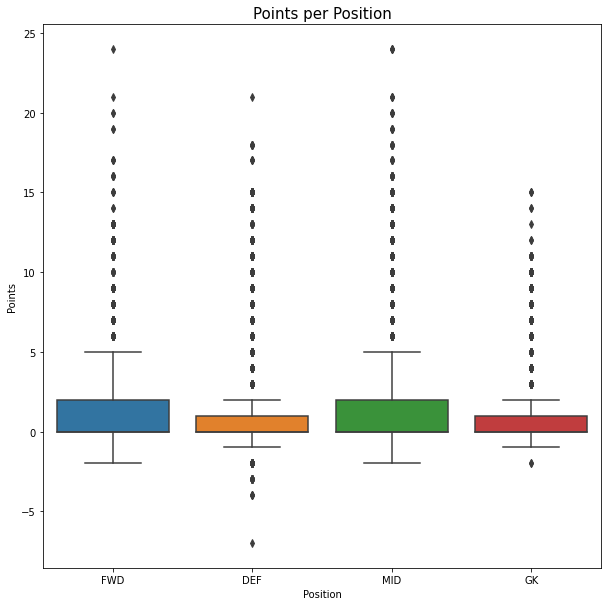

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
bp = sns.boxplot(data=fpl_data, x = 'position', y = 'total_points')
plt.title('Points per Position', fontsize = 15)
bp.set_xlabel("Position", size = 10)
bp.set_ylabel("Points", size = 10)
plt.show()

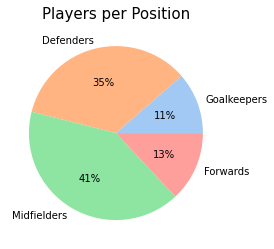

In [27]:
#Pie chart depicting the breakdown of player position.
positions = fpl_data['position']
plt.title('Players per Position', fontsize = 15)
pc = [positions.value_counts()['GK'], positions.value_counts()['DEF'], positions.value_counts()['MID'], positions.value_counts()['FWD']]
labels = ['Goalkeepers', 'Defenders', 'Midfielders', 'Forwards']
colors = sns.color_palette('pastel')[0:5]

plt.pie(pc, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

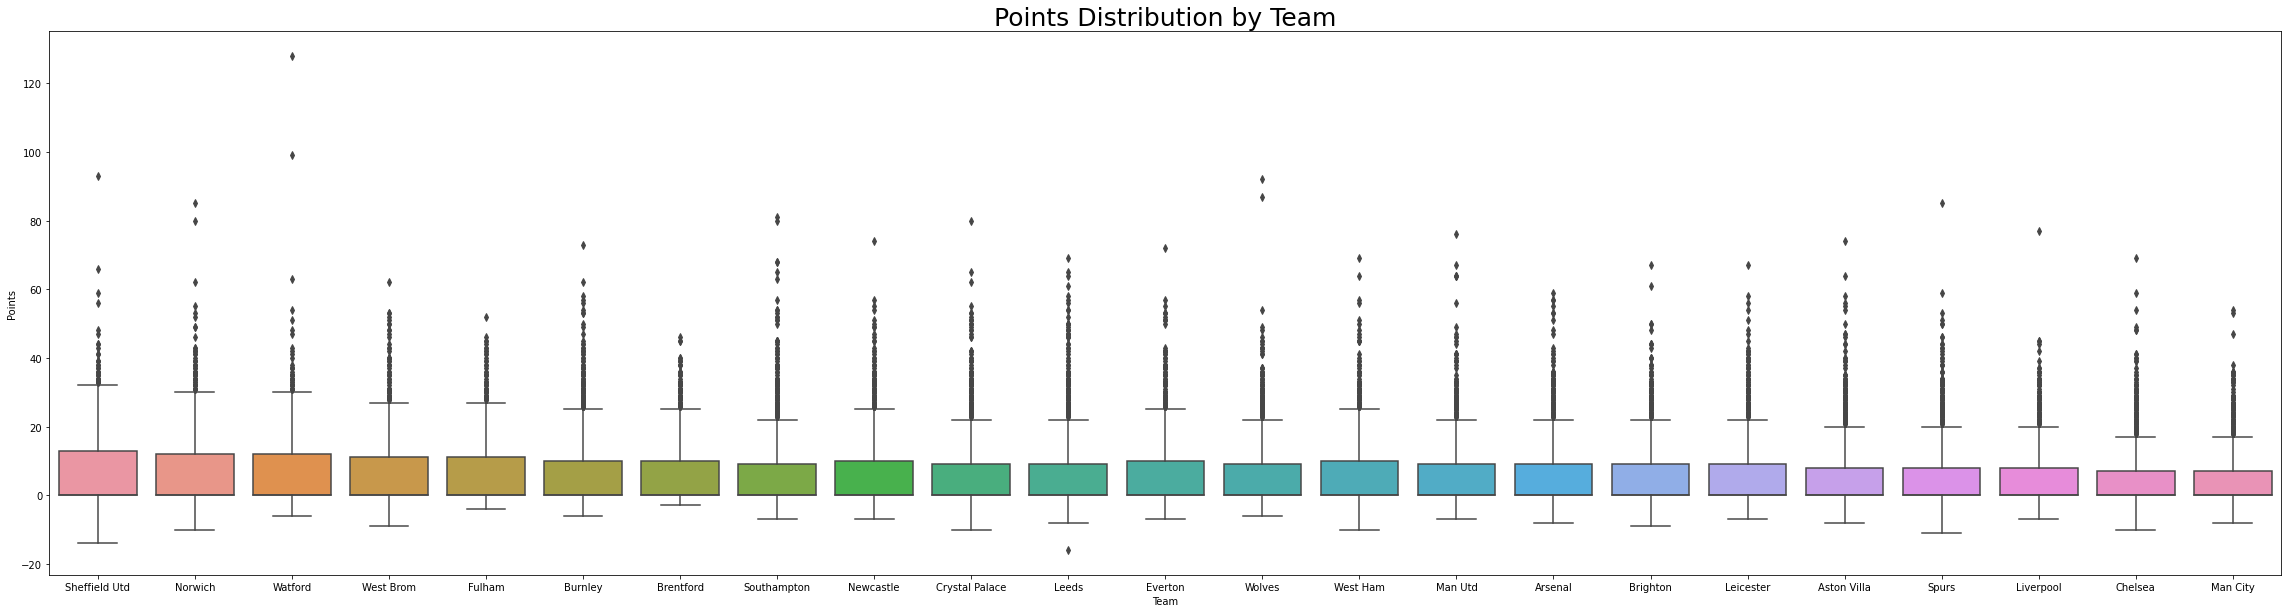

In [28]:
fig, ax = plt.subplots(figsize=(40,10))
c = fpl_data.groupby('opp_team_name')["bps"].mean().sort_values()[::-1].index
b = sns.boxplot(data=fpl_data, x='opp_team_name', y='bps', ax=ax, order = c)
b.set_xlabel("Team", size = 10)
b.set_ylabel("Points", size = 10)
plt.title('Points Distribution by Team', fontsize = 25)
plt.show()

## Model Building

In [29]:
#Import Libraries for ML building.
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [30]:
fpl_ml_data = pd.read_csv('data/fpl_data.csv', index_col = 0)
fpl_ml_data.drop(['kickoff_time'], axis = 1, inplace = True)
obj_cols = fpl_ml_data.columns[fpl_ml_data.dtypes == object]
obj_cols

Index(['season_x', 'name', 'position', 'team_x', 'opp_team_name'], dtype='object')

In [31]:
fpl_data_refined = fpl_ml_data.loc[:,[i for i in list(fpl_ml_data.columns) if i not in ['name','team_x', 'opp_team_name', 'season_x']]]
fpl_data_refined = pd.get_dummies(fpl_data_refined, columns = ['position', 'GW'], drop_first = True)

cols = fpl_data_refined.columns[fpl_data_refined.isna().sum()>0]
for c in cols:
    fpl_data_refined[c].fillna(0,inplace = True)

In [32]:
fpl_data_refined.columns[fpl_data_refined.isna().sum()>0]

Index([], dtype='object')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(fpl_data_refined.loc[:, fpl_data_refined.columns != 'total_points'],
                                                    fpl_data_refined['total_points'],
                                                    test_size = 0.2, random_state = 123)

In [34]:
train_results = {}
test_results = {}

### ML models

In [35]:
#Ridge Linear Regression
ridge = Ridge()

params = {'ridge__alpha': [0.0001, 0.01, 0.1, 0.5, 0.9],
          'ridge__solver' : ['lsqr']}

pipe = make_pipeline(ridge)
grid = GridSearchCV(pipe, param_grid = params, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = 5)
ridge = grid.fit(x_train, y_train)

print('Best MSE: ', grid.best_score_)
print('Best Parameters: ', grid.best_estimator_)

pred_y_train = ridge.predict(x_train)
pred_y_test = ridge.predict(x_test)
train_error = mean_squared_error(pred_y_train, y_train)
test_error = mean_squared_error(pred_y_test, y_test)

print("Training Error: " + str(train_error)+ ", Testing Error: " + str(test_error))
train_results['Ridge_regression'] = train_error
test_results['Ridge_regression'] = test_error

Best MSE:  -5.486612476146517
Best Parameters:  Pipeline(steps=[('ridge', Ridge(alpha=0.0001, solver='lsqr'))])
Training Error: 5.479615057134457, Testing Error: 5.234036089790791


In [36]:
# #Random Forest
#Uncomment to run it just takes a while to load.
# rf = RandomForestRegressor(random_state = 0, criterion = 'mse')

# params = {'randomforestregressor__n_estimators' : range(100,500,200),
#           'randomforestregressor__min_samples_split' : range(2,10,3)}

# pipe = make_pipeline(rf)
# grid = GridSearchCV(pipe, param_grid = params, scoring='neg_mean_squared_error', n_jobs = -1, cv = 5)
# rf = grid.fit(x_train, y_train)

# print('Best MSE for Random Forest Regressor: ', grid.best_score_)
# print(f'Best Parameters for Random Forest Regressor: Estimators: {grid.best_estimator_} and Min Samples Split: {grid.n_splits_} Params: {grid.best_params_}')

# pred_y_train = rf.predict(x_train)
# pred_y_test = rf.predict(x_test)
# train_error = mean_squared_error(pred_y_train, y_train)
# test_error = mean_squared_error(pred_y_test, y_test)

# print("Training Error: " + str(train_error)+ " Testing Error: " + str(test_error))
# train_results['random_forest'] = train_error
# test_results['random_forest'] = test_error

In [37]:
#Linear Regression
lr = LinearRegression()

params = {}

pipe = make_pipeline(lr)
grid = GridSearchCV(pipe, param_grid = params, scoring='neg_mean_squared_error', n_jobs = -1,  cv = 5)
lr = grid.fit(x_train, y_train)

print('Best MSE: ', grid.best_score_)
print('Best Parameters: ', grid.best_estimator_)

pred_y_train = lr.predict(x_train)
pred_y_test = lr.predict(x_test)
train_error = mean_squared_error(pred_y_train, y_train)
test_error = mean_squared_error(pred_y_test, y_test)

print("Training Error: " + str(train_error)+ ", Testing Error: " + str(test_error))
train_results['Linear_regression'] = train_error
test_results['Linear_regression'] = test_error

Best MSE:  -0.27709338329786704
Best Parameters:  Pipeline(steps=[('linearregression', LinearRegression())])
Training Error: 0.2749748792910004, Testing Error: 0.2834221972291002


In [38]:
#Lasso Linear Regression
lasso = linear_model.Lasso()

params = {'lasso__alpha':[0.001, 0.01, 0.1, 0.5, 0.9]}

pipe = make_pipeline(lasso)
grid = GridSearchCV(pipe, param_grid = params, scoring='neg_mean_squared_error', n_jobs = -1, cv = 5)
lasso = grid.fit(x_train, y_train)

print('Best MSE: ', grid.best_score_)
print('Best Parameters: ', grid.best_estimator_)

pred_y_train = lasso.predict(x_train)
pred_y_test = lasso.predict(x_test)
train_error = mean_squared_error(pred_y_train, y_train)
test_error = mean_squared_error(pred_y_test, y_test)

print("Training Error: " + str(train_error)+ ", Testing Error: " + str(test_error))
train_results['Lasso_regression'] = train_error
test_results['Lasso_regression'] = test_error

Best MSE:  -0.2835244262778883
Best Parameters:  Pipeline(steps=[('lasso', Lasso(alpha=0.001))])
Training Error: 0.2818215706041146, Testing Error: 0.2905515459289682


/Users/jawadnadeem/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.360e+03, tolerance: 1.693e+01
  model = cd_fast.enet_coordinate_descent(
/Users/jawadnadeem/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+02, tolerance: 1.693e+01
  model = cd_fast.enet_coordinate_descent(
/Users/jawadnadeem/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre